In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import pandas as pd
import numpy as np
import xarray as xr
import seaborn as sns
import joblib
import sys
from glob import glob 
# import wrf

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
# from matplotlib.gridspec import GridSpec
from matplotlib.colors import BoundaryNorm
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors
from matplotlib.colors import LogNorm

sys.path.append('/home/freimax/msc_thesis/scripts/helpers/')
import helper

from sklearn.metrics import r2_score, mean_squared_error
from collections import Counter

sys.path.append('/home/freimax/msc_thesis/scripts/random_forest/')
import rf_functions

sys.path.append('/home/freimax/msc_thesis/scripts/IFS-18/')
import traj_processing_functions

sys.path.append('/home/freimax/msc_thesis/scripts/helpers/')
import data_preprocessing_helpers

sys.path.append('/home/freimax/msc_thesis/scripts/plotting_functions/')
import plot_helpers
import make_plots_traj

---
### Plotting Functions

In [3]:
# df_traj    = traj_processing_functions.load_clean_trajectories(file, era5_data=True)

---
### Start data loading andfunction calls

In [4]:
save_path = '/home/freimax/msc_thesis/figures/IFS-18/traj/preds_along_trajs'

In [5]:
# month_list = ['FEB18']
# df_traj_debug, df_big_debug = traj_processing_functions.load_trajs_predict_bcp(folder_branch_list=month_list, era5_data=False, traj_file_path=f'/net/helium/atmosdyn/freimax/data_msc/IFS-18/IFS-traj/trajectories', debug=True)

In [6]:
# df_big_debug

In [10]:
model_tsubsi, model_tmeltsi, model_tevr = helper.load_rf_models()

                   *** Load Models ***                    
  Load model tsubsI
  Load model tmeltsi
  Load model tevr


In [11]:
month_list = ['DEC17','JAN18','FEB18','MAR18','APR18','MAY18','JUN18','JUL18','AUG18','SEP18','OCT18','NOV18']

df_big = traj_processing_functions.load_trajs_predict_bcp(
    traj_file_path=f'/net/helium/atmosdyn/freimax/data_msc/IFS-18/IFS-traj/trajectories', 
    model_tmeltsi=model_tmeltsi, 
    model_tsubsi=model_tsubsi,
    model_tevr=model_tevr, 
    folder_branch_list=month_list, 
    era5_data=False,
    )

----------------------------------------------- DEC17 ------ Nr. of files: 2 -----------------------------------------------

  Cyclone ID:	1		Date:	20171210_14
  Start loading Traj fiels
Done Loading/Cleaning
  Make predictions along trajectory 

  Cyclone ID:	2		Date:	20180101_19
  Start loading Traj fiels
Done Loading/Cleaning
  Make predictions along trajectory 
----------------------------------------------- JAN18 ------ Nr. of files: 2 -----------------------------------------------

  Cyclone ID:	3		Date:	20180105_01
  Start loading Traj fiels
Done Loading/Cleaning
  Make predictions along trajectory 

  Cyclone ID:	4		Date:	20180127_16
  Start loading Traj fiels
Done Loading/Cleaning
  Make predictions along trajectory 
----------------------------------------------- FEB18 ------ Nr. of files: 2 -----------------------------------------------

  Cyclone ID:	5		Date:	20180206_17
  Start loading Traj fiels
Done Loading/Cleaning
  Make predictions along trajectory 

  Cyclone ID:	

In [13]:
df_big.to_hdf('/net/helium/atmosdyn/freimax/data_msc/IFS-18/IFS-traj/trajectories/df_big_IFS18.h5', key='df', mode='w')

---
### Plot evaluation for summer and winter season

In [6]:
summer_months = ['APR18','MAY18', 'JUN18', 'JUL18', 'AUG18', 'SEP18']
df_summer = df_big[df_big['month'].isin(summer_months)].copy()

winter_months = ['OCT18','NOV18', 'DEC17', 'JAN18', 'FEB18', 'MAR18']
df_winter = df_big[df_big['month'].isin(winter_months)].copy()

df_big_t0 = df_big[df_big['time']==0]
df_summer_t0 = df_summer[df_summer['time']==0]
df_winter_t0 = df_winter[df_winter['time']==0]

In [7]:
save_path = '/home/freimax/msc_thesis/figures/thesis_msc/Chapter_RandomForest/traj_analysis'

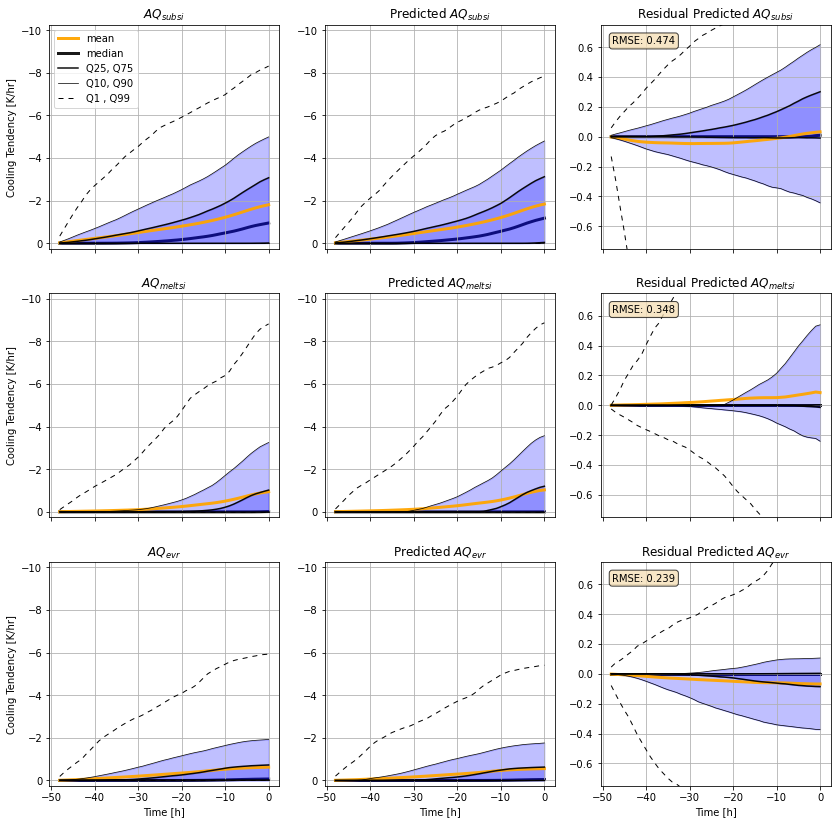

In [12]:
make_plots_traj.plot_accu_cooling_over_time(df_tr=df_big, df_tr_rf=df_big, truth_available=True, save_path=f'{save_path}/timerseries_traj_cooling.png')

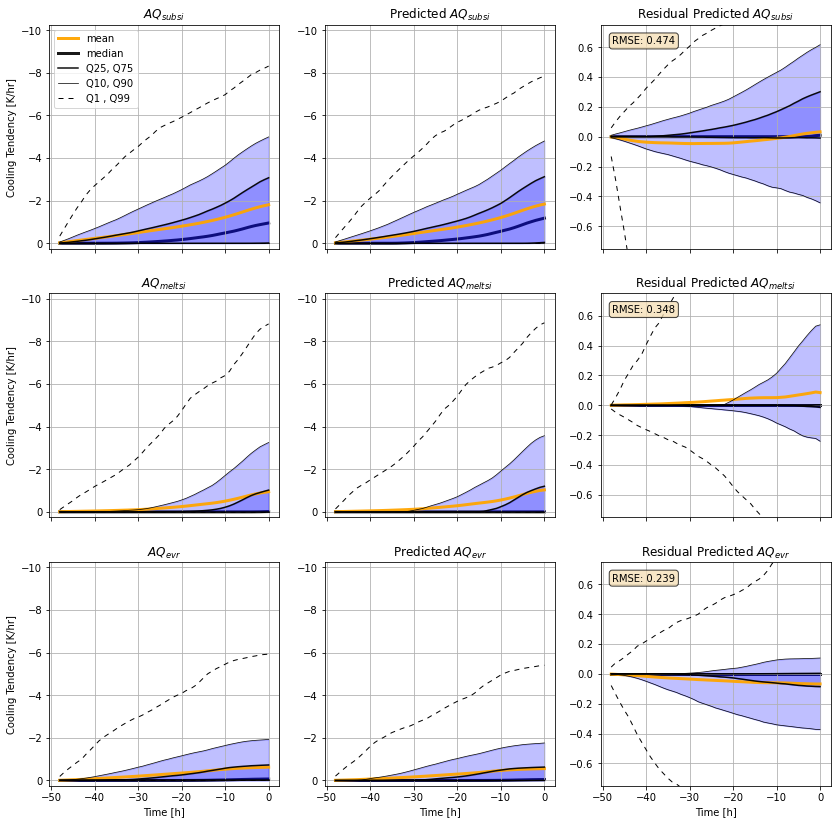

In [8]:
make_plots_traj.plot_accu_cooling_over_time(df_tr=df_big, df_tr_rf=df_big, truth_available=True, save_path=f'{save_path}/timerseries_traj_cooling.png')

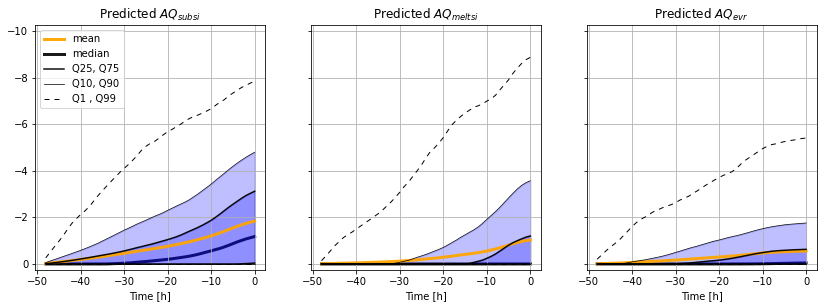

In [9]:
make_plots_traj.plot_accu_cooling_over_time(df_tr=df_big, df_tr_rf=df_big, truth_available=False)

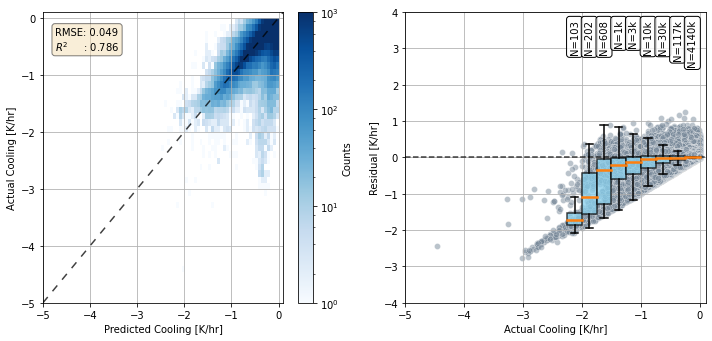

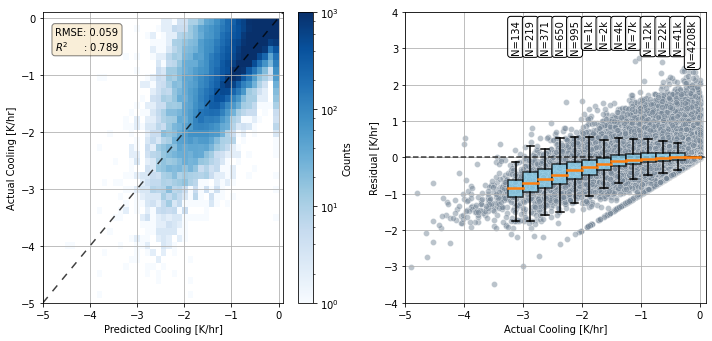

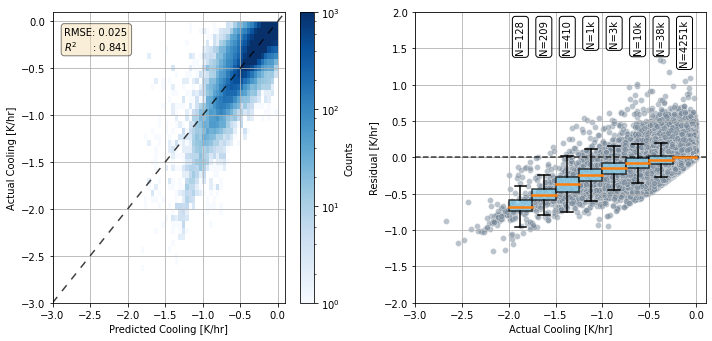

In [10]:
make_plots_traj.plot_prediction_vs_truth_2dhist(y_true=df_big['tsubsi'],  y_pred=df_big['tsubsi_pred'],  save_path=f'{save_path}/tsubsi_predVStrue_resid_inst.png', title=None, width_boxplot=0.25)
plt.show()
make_plots_traj.plot_prediction_vs_truth_2dhist(y_true=df_big['tmeltsi'], y_pred=df_big['tmeltsi_pred'], save_path=f'{save_path}/tmeltsi_predVStrue_resid_inst.png', title=None, width_boxplot=0.25)
plt.show()
make_plots_traj.plot_prediction_vs_truth_2dhist(y_true=df_big['tevr'], y_pred=df_big['tevr_pred'], save_path=f'{save_path}/tevr_predVStrue_resid_inst.png', title=None, width_boxplot=0.25)
plt.show()

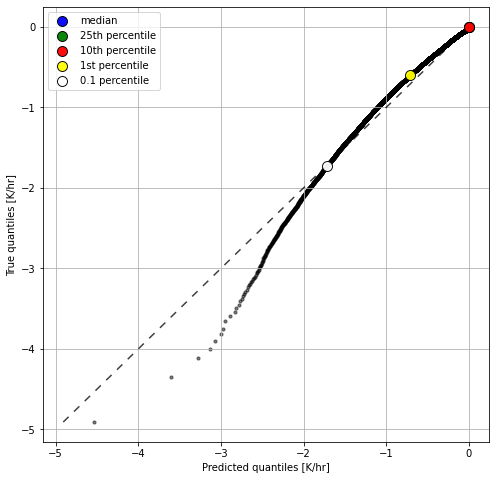

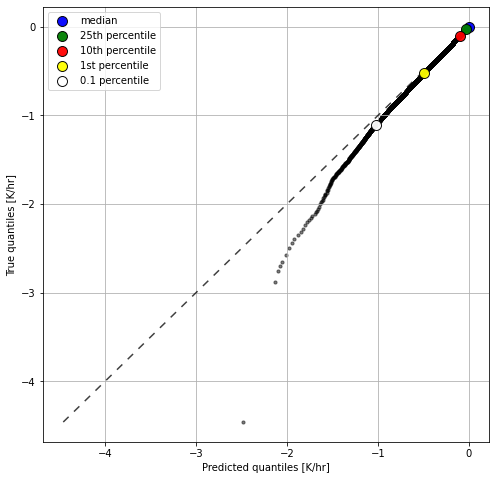

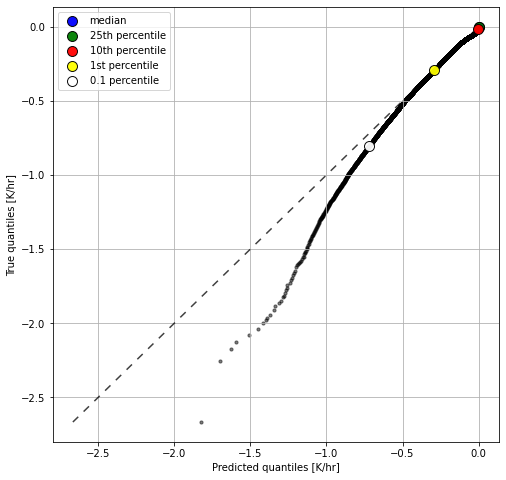

In [15]:
make_plots_traj.get_qq_plot(y_true=df_big['tmeltsi'], y_pred=df_big['tmeltsi_pred'], bcp='tmeltsi', save_path=f'{save_path}/tmeltsi_QQ_inst.png', )#title=f'Atmeltsi backward-trajectory evaluation')
plt.show()
make_plots_traj.get_qq_plot(y_true=df_big['tsubsi'], y_pred=df_big['tsubsi_pred'], bcp='tsubsi', save_path=f'{save_path}/tsubsi_QQ_inst.png',)# title=f'Atsubsi backward-trajectory evaluation')
plt.show()
make_plots_traj.get_qq_plot(y_true=df_big['tevr'], y_pred=df_big['tevr_pred'], bcp='Atevr', save_path=f'{save_path}/tevr_QQ_inst.png', )#title=f'Atmeltsi backward-trajectory evaluation')

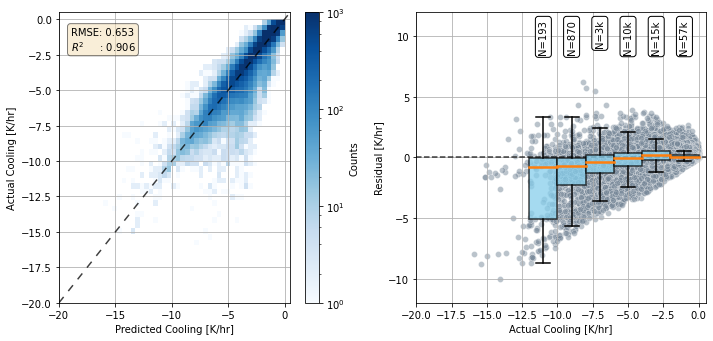

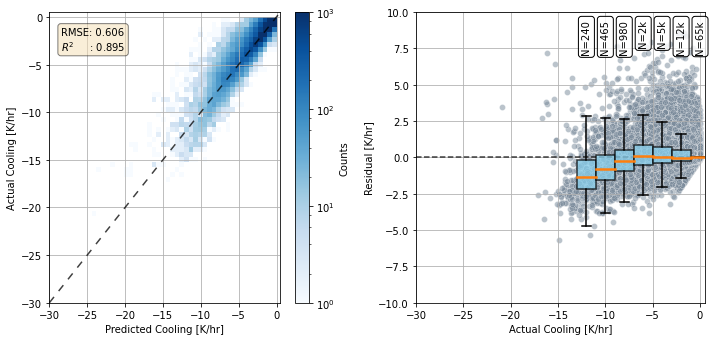

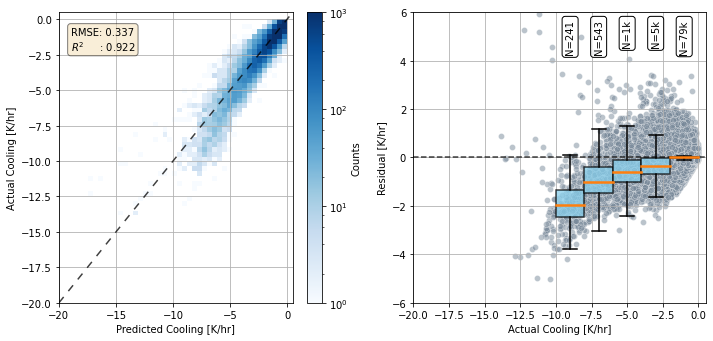

In [14]:
make_plots_traj.plot_prediction_vs_truth_2dhist(y_true=df_big_t0['Atsubsi'], y_pred=df_big_t0['Atsubsi_pred'], save_path=f'{save_path}/tmeltsi_predVStrue_resid_ACCU.png', title=None, width_boxplot=2)
plt.show()
make_plots_traj.plot_prediction_vs_truth_2dhist(y_true=df_big_t0['Atmeltsi'], y_pred=df_big_t0['Atmeltsi_pred'],  save_path=f'{save_path}/tsubsi_predVStrue_resid_ACCU.png', title=None, width_boxplot=2)
plt.show()
make_plots_traj.plot_prediction_vs_truth_2dhist(y_true=df_big_t0['Atevr'], y_pred=df_big_t0['Atevr_pred'], save_path=f'{save_path}/tevr_predVStrue_resid_ACCU.png', title=None, width_boxplot=2)


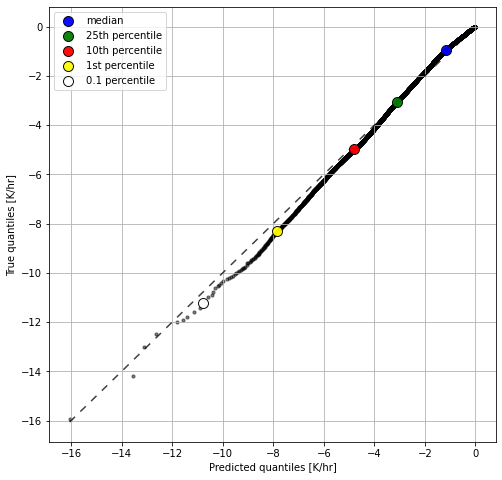

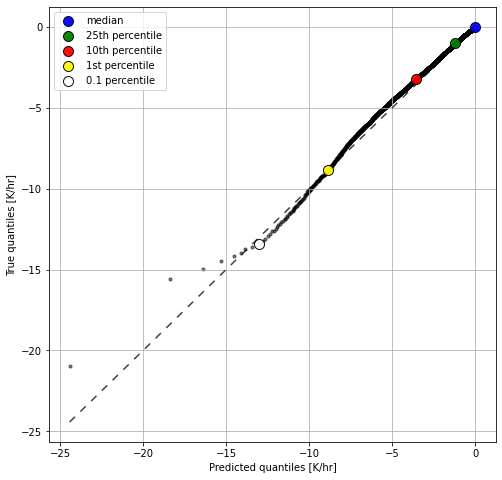

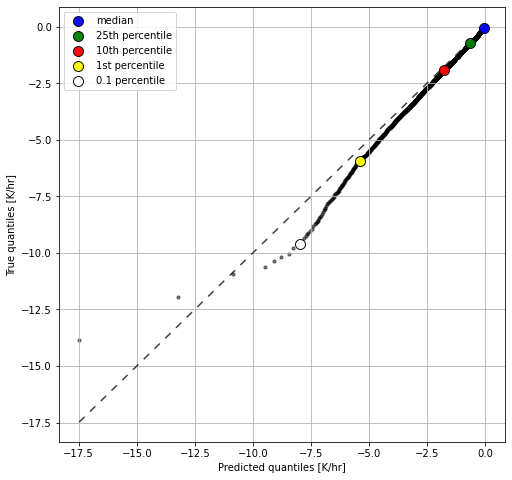

In [16]:
make_plots_traj.get_qq_plot(y_true=df_big_t0['Atsubsi'], y_pred=df_big_t0['Atsubsi_pred'], bcp='Atsubsi', save_path=f'{save_path}/tsubsi_QQ_ACCU.png')# title=f'Atsubsi backward-trajectory evaluation')
plt.show()
make_plots_traj.get_qq_plot(y_true=df_big_t0['Atmeltsi'], y_pred=df_big_t0['Atmeltsi_pred'], bcp='Atmeltsi', save_path=f'{save_path}/tmeltsi_QQ_ACCU.png' )#title=f'Atmeltsi backward-trajectory evaluation')
plt.show()
make_plots_traj.get_qq_plot(y_true=df_big_t0['Atevr'], y_pred=df_big_t0['Atevr_pred'], bcp='Atevr', save_path=f'{save_path}/tevr_QQ_ACCU.png' )


In [18]:
df_big_t0.shape

(87853, 31)

In [24]:
Atsubsi_rmse  = make_plots_traj.calculate_rmse(df_big['Atsubsi'], df_big['Atsubsi_pred'])
Atmeltsi_rmse = make_plots_traj.calculate_rmse(df_big['Atmeltsi'], df_big['Atmeltsi_pred'])
Atevr_rmse    = make_plots_traj.calculate_rmse(df_big['Atevr'], df_big['Atevr_pred'])

tsubsi_rmse  = make_plots_traj.calculate_rmse(df_big['tsubsi'], df_big['tsubsi_pred'])
tmeltsi_rmse = make_plots_traj.calculate_rmse(df_big['tmeltsi'], df_big['tmeltsi_pred'])
tevr_rmse    = make_plots_traj.calculate_rmse(df_big['tevr'], df_big['tevr_pred'])

print(f'RMSE Atsubsi:      {Atsubsi_rmse:.4f}\t\tRMSE tsubsi:      {tsubsi_rmse:.4f}')
print(f'RMSE Atmeltsi:     {Atmeltsi_rmse:.4f}\t\tRMSE tmeltsi:     {tmeltsi_rmse:.4f}')
print(f'RMSE Atevr:        {Atevr_rmse:.4f}\t\tRMSE tevr:        {tevr_rmse:.4f}')

print('\n--------------------------------------------------------------------------\nMETRICS AT TIMESTEP t=0:\n------------------------')

Atsubsi_rmse = make_plots_traj.calculate_rmse(df_big_t0['Atsubsi'], df_big_t0['Atsubsi_pred'])
Atmeltsi_rmse = make_plots_traj.calculate_rmse(df_big_t0['Atmeltsi'], df_big_t0['Atmeltsi_pred'])
Atevr_rmse    = make_plots_traj.calculate_rmse(df_big_t0['Atevr'], df_big_t0['Atevr_pred'])

tsubsi_rmse = make_plots_traj.calculate_rmse(df_big_t0['tsubsi'], df_big_t0['tsubsi_pred'])
tmeltsi_rmse = make_plots_traj.calculate_rmse(df_big_t0['tmeltsi'], df_big_t0['tmeltsi_pred'])
tevr_rmse    = make_plots_traj.calculate_rmse(df_big_t0['tevr'], df_big_t0['tevr_pred'])

print(f'RMSE Atsubsi_t0:   {Atsubsi_rmse:.4f}\t\tRMSE tsubsi_t0:   {tsubsi_rmse:.4f}')
print(f'RMSE Atmeltsi_t0:  {Atmeltsi_rmse:.4f}\t\tRMSE tmeltsi_t0:  {tmeltsi_rmse:.4f}')
print(f'RMSE Atevr_t0:     {Atevr_rmse:.4f}\t\tRMSE tevr_t0:     {tevr_rmse:.4f}')

RMSE Atsubsi:      0.4742		RMSE tsubsi:      0.0486
RMSE Atmeltsi:     0.3480		RMSE tmeltsi:     0.0588
RMSE Atevr:        0.2391		RMSE tevr:        0.0251

--------------------------------------------------------------------------
METRICS AT TIMESTEP t=0:
------------------------
RMSE Atsubsi_t0:   0.6527		RMSE tsubsi_t0:   0.0655
RMSE Atmeltsi_t0:  0.6063		RMSE tmeltsi_t0:  0.0747
RMSE Atevr_t0:     0.3373		RMSE tevr_t0:     0.0228


---
### Plot syinoptic overview and composites

In [192]:
df_composite_winter = traj_processing_functions.get_composite(df_winter_t0)
print('\n============================================================================================================================\n')
df_composite_summer = traj_processing_functions.get_composite(df_summer_t0)
print('\n============================================================================================================================\n')
df_composite = traj_processing_functions.get_composite(df_big_t0)
comp_cyc = df_composite[df_composite['id_CYC']==1]
test_cyc = df_big_t0[df_big_t0['id_CYC']==1]

Center lon (before): -9.6	(after): 0.0 		 Center_lat: 64.0	(after): 0.0		Lon_difference: 4.0
Center lon (before): -11.2	(after): 0.0 		 Center_lat: 69.6	(after): 0.0		Lon_difference: 4.0
Center lon (before): -65.6	(after): 0.0 		 Center_lat: 42.8	(after): 0.0		Lon_difference: 4.0
Center lon (before): -32.0	(after): -0.0 		 Center_lat: 59.6	(after): 0.0		Lon_difference: 3.0
Center lon (before): 176.4	(after): 0.0 		 Center_lat: 48.8	(after): 0.0		Lon_difference: 3.0
Center lon (before): -45.2	(after): 0.0 		 Center_lat: 58.8	(after): 0.0		Lon_difference: 3.0
Center lon (before): 73.2	(after): 0.0 		 Center_lat: 65.6	(after): 0.0		Lon_difference: 4.0
Center lon (before): -9.2	(after): 0.0 		 Center_lat: 41.2	(after): 0.0		Lon_difference: 4.0
Center lon (before): 146.8	(after): 0.0 		 Center_lat: 44.8	(after): 0.0		Lon_difference: 3.0
Center lon (before): -40.0	(after): 0.0 		 Center_lat: 62.4	(after): 0.0		Lon_difference: 3.0
Center lon (before): -130.8	(after): 0.0 		 Center_lat: 42.8	(

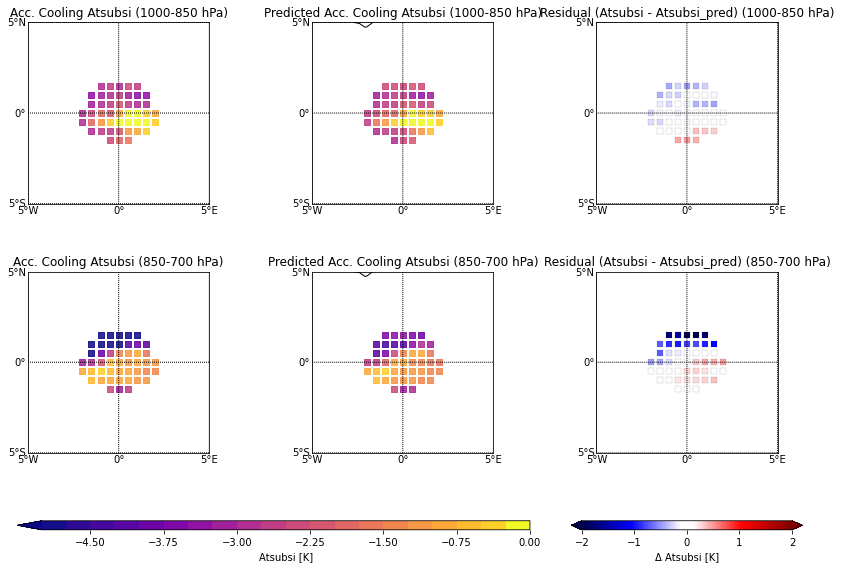

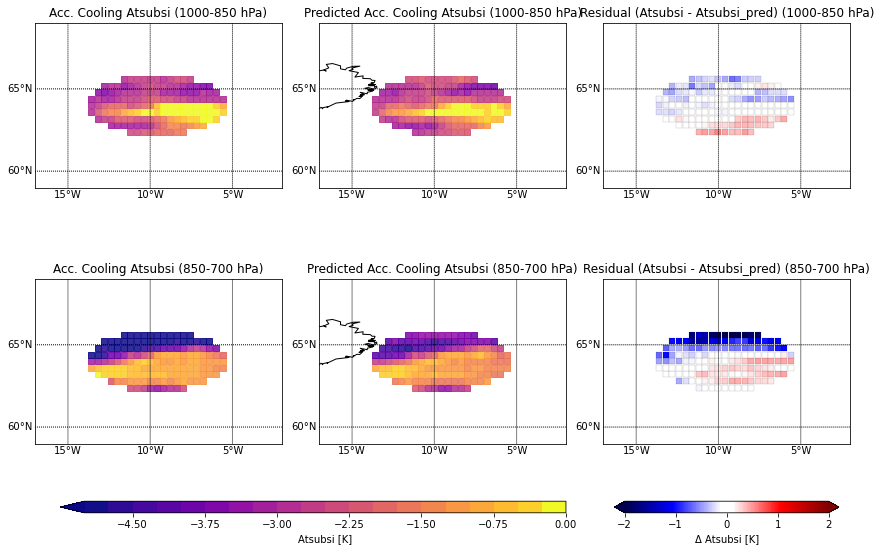

In [193]:
# plot_synoptic_accumulated_cooling(df_center=df_composite_winter, df_center_pred=df_composite_winter, month=None, cooling_var='Atsubsi', date=None, save_fig=None, composite=True)
# plot_synoptic_accumulated_cooling(df_center=df_composite_summer, df_center_pred=df_composite_summer, month=None, cooling_var='Atsubsi', date=None, save_fig=None, composite=True)
plt.show()
make_plots_traj.plot_synoptic_accumulated_cooling(df_center=comp_cyc, df_center_pred=comp_cyc, month=None, cooling_var='Atsubsi', date=None, save_fig=None, composite=True)
plt.show()
make_plots_traj.plot_synoptic_accumulated_cooling(df_center=test_cyc, df_center_pred=test_cyc, month=None, cooling_var='Atsubsi', date=None, save_fig=None, composite=True)

### Plots for composites (all trajs)
- Plot when most cooling occured for trajectories (Acooling vs time)
- Plot final pressure vs accumulated cooling

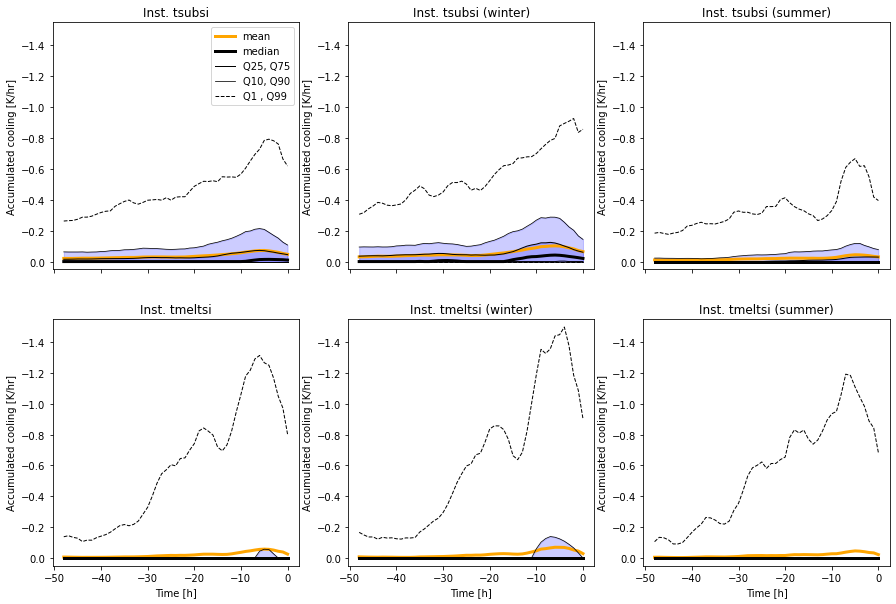

In [194]:
## Plot time vs instantaneous cooling
wanted_fields = ['tsubsi_pred', 'tmeltsi_pred']
inst_cooling_metrics = make_plots_traj.get_quantiles(df_big, bc_processes=wanted_fields)
inst_cooling_metrics_winter = make_plots_traj.get_quantiles(df_winter, bc_processes=wanted_fields)
inst_cooling_metrics_summer = make_plots_traj.get_quantiles(df_summer, bc_processes=wanted_fields)


fig,ax = plt.subplots(2,3, figsize=(15,10), sharex=True, sharey=False)
    
## Call plotting function
time_axis = np.arange(-48,1,1)
make_plots_traj.subplot_traj_distri(ax=ax[0,0], x_axis=time_axis, metric_list=inst_cooling_metrics, bc_process = wanted_fields[0] , ylabel=True, xlabel=False, legend=True , title='Inst. tsubsi')
make_plots_traj.subplot_traj_distri(ax=ax[1,0], x_axis=time_axis, metric_list=inst_cooling_metrics, bc_process = wanted_fields[1] , ylabel=True, xlabel=True , legend=False, title='Inst. tmeltsi')

make_plots_traj.subplot_traj_distri(ax=ax[0,1], x_axis=time_axis, metric_list=inst_cooling_metrics_winter, bc_process = wanted_fields[0] , ylabel=True, xlabel=False, legend=False , title='Inst. tsubsi (winter)')
make_plots_traj.subplot_traj_distri(ax=ax[1,1], x_axis=time_axis, metric_list=inst_cooling_metrics_winter, bc_process = wanted_fields[1] , ylabel=True, xlabel=True , legend=False, title='Inst. tmeltsi (winter)')

make_plots_traj.subplot_traj_distri(ax=ax[0,2], x_axis=time_axis, metric_list=inst_cooling_metrics_summer, bc_process = wanted_fields[0] , ylabel=True, xlabel=False, legend=False , title='Inst. tsubsi (summer)')
make_plots_traj.subplot_traj_distri(ax=ax[1,2], x_axis=time_axis, metric_list=inst_cooling_metrics_summer, bc_process = wanted_fields[1] , ylabel=True, xlabel=True , legend=False, title='Inst. tmeltsi (summer)')

In [195]:
## Differentiate trajectories that arrive at different height levels: 
ids_high_end = df_big[(df_big['time']==0) & (df_big['p']<=800)]['id']
ids_mid_end = df_big[(df_big['time']==0) & (df_big['p']<=900) & (df_big['p']>800)]['id']
ids_low_end = df_big[(df_big['time']==0) & (df_big['p']>900)]['id']

In [196]:
df_high_end = df_big[df_big['id'].isin(ids_high_end)]
df_mid_end = df_big[df_big['id'].isin(ids_mid_end)]
df_low_end = df_big[df_big['id'].isin(ids_low_end)]

Text(0.95, 0.95, 'Count: 1981756')

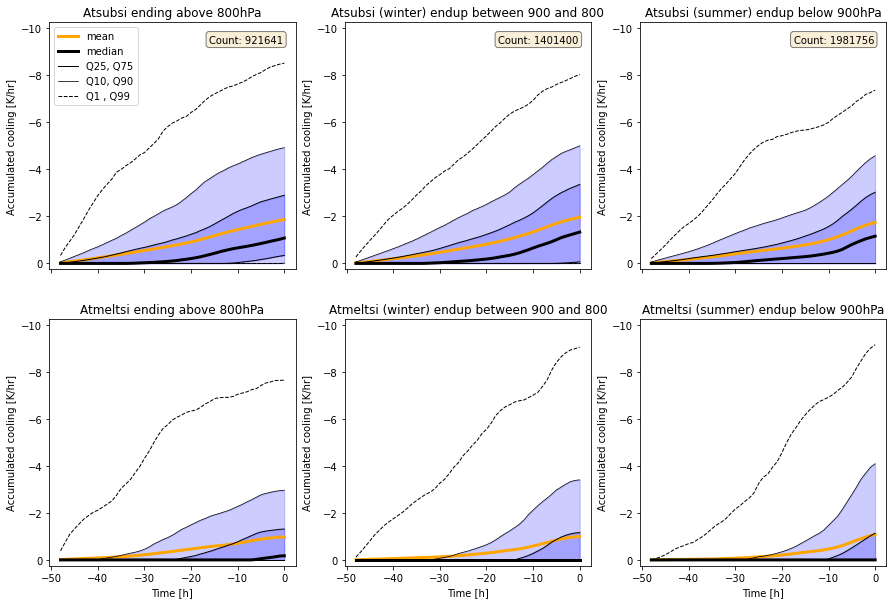

In [197]:
## Plot time vs instantaneous cooling
wanted_fields = ['Atsubsi_pred', 'Atmeltsi_pred']
inst_cooling_metrics_highend = make_plots_traj.get_quantiles(df_high_end, bc_processes=wanted_fields)
inst_cooling_metrics_midend  = make_plots_traj.get_quantiles(df_mid_end, bc_processes=wanted_fields)
inst_cooling_metrics_lowend  = make_plots_traj.get_quantiles(df_low_end, bc_processes=wanted_fields)


fig,ax = plt.subplots(2,3, figsize=(15,10), sharex=True, sharey=False)
    
## Call plotting function
time_axis = np.arange(-48,1,1)
make_plots_traj.subplot_traj_distri(ax=ax[0,0], x_axis=time_axis, metric_list=inst_cooling_metrics_highend, bc_process=wanted_fields[0] , ylabel=True, xlabel=False, legend=True , title='Atsubsi ending above 800hPa')
make_plots_traj.subplot_traj_distri(ax=ax[1,0], x_axis=time_axis, metric_list=inst_cooling_metrics_highend, bc_process=wanted_fields[1] , ylabel=True, xlabel=True , legend=False, title='Atmeltsi ending above 800hPa')

make_plots_traj.subplot_traj_distri(ax=ax[0,1], x_axis=time_axis, metric_list=inst_cooling_metrics_midend, bc_process=wanted_fields[0] , ylabel=True, xlabel=False, legend=False , title='Atsubsi (winter) endup between 900 and 800')
make_plots_traj.subplot_traj_distri(ax=ax[1,1], x_axis=time_axis, metric_list=inst_cooling_metrics_midend, bc_process=wanted_fields[1] , ylabel=True, xlabel=True , legend=False, title='Atmeltsi (winter) endup between 900 and 800')

make_plots_traj.subplot_traj_distri(ax=ax[0,2], x_axis=time_axis, metric_list=inst_cooling_metrics_lowend, bc_process=wanted_fields[0] , ylabel=True, xlabel=False, legend=False , title='Atsubsi (summer) endup below 900hPa')
make_plots_traj.subplot_traj_distri(ax=ax[1,2], x_axis=time_axis, metric_list=inst_cooling_metrics_lowend, bc_process=wanted_fields[1] , ylabel=True, xlabel=True , legend=False, title='Atmeltsi (summer) endup below 900hPa')


ax[0,0].text(0.95, 0.95, f'Count: {df_high_end.shape[0]}', transform=ax[0,0].transAxes, 
             fontsize=10, va='top', ha='right', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax[0,1].text(0.95, 0.95, f'Count: {df_mid_end.shape[0]}', transform=ax[0,1].transAxes, 
             fontsize=10, va='top', ha='right', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax[0,2].text(0.95, 0.95, f'Count: {df_low_end.shape[0]}', transform=ax[0,2].transAxes, 
             fontsize=10, va='top', ha='right', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))


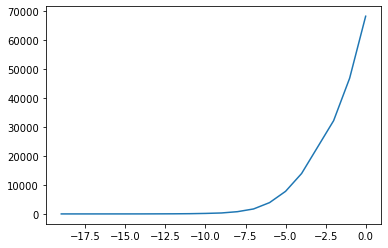

In [198]:
size=[]
coolings = np.arange(-0,-20,-1)
for tcool in coolings:
    size.append(df_big_t0[df_big_t0['Atsubsi_pred'] < tcool].shape[0])

plt.plot(coolings, size)


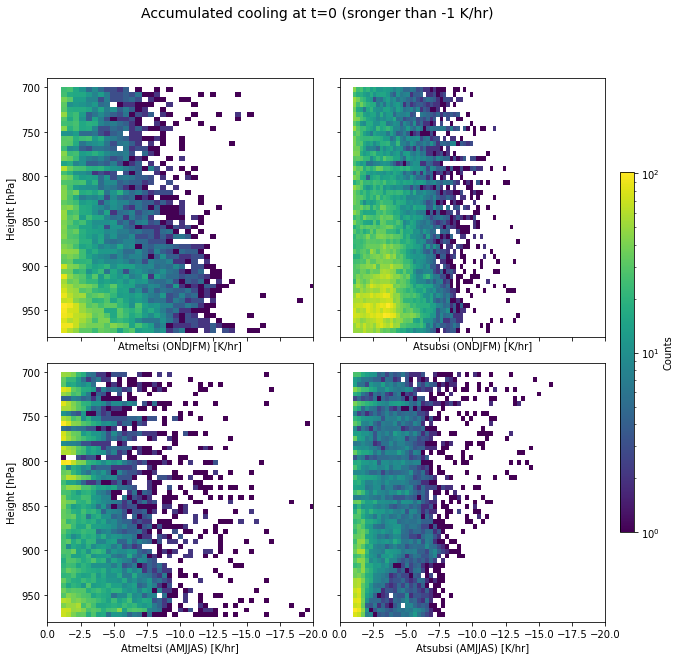

In [199]:
## Select a cooling threshold
threshold = -1  
df_wt0_tsubsi = df_winter_t0[df_winter_t0['Atsubsi_pred']  < threshold]
df_st0_tsubsi = df_summer_t0[df_summer_t0['Atsubsi_pred']  < threshold]
df_wt0_tmeltsi = df_winter_t0[df_winter_t0['Atmeltsi_pred']< threshold]
df_st0_tmeltsi = df_summer_t0[df_summer_t0['Atmeltsi_pred']< threshold]




fig, ax = plt.subplots(2,2,figsize=(10,10),sharey=True,sharex=True)


plt.suptitle(f'Accumulated cooling at t=0 (sronger than {threshold} K/hr)', fontsize=14)

bins = (50, 50) 
cax1 = ax[0,0].hist2d(df_wt0_tmeltsi['Atmeltsi_pred'], df_wt0_tmeltsi['p'], bins=bins, cmap='viridis', norm=LogNorm())
cax2 = ax[0,1].hist2d(df_wt0_tsubsi['Atsubsi_pred'], df_wt0_tsubsi['p'], bins=bins, cmap='viridis', norm=LogNorm())
cax3 = ax[1,0].hist2d(df_st0_tmeltsi['Atmeltsi_pred'], df_st0_tmeltsi['p'], bins=bins, cmap='viridis', norm=LogNorm())
cax4 = ax[1,1].hist2d(df_st0_tsubsi['Atsubsi_pred'], df_st0_tsubsi['p'], bins=bins, cmap='viridis', norm=LogNorm())

for ax_row in ax:
    for axi in ax_row:
        axi.set_ylim(690,980)
        axi.invert_yaxis()
        axi.invert_xaxis()
        axi.set_xlim(0, -20)

ax[0,0].set_ylabel('Height [hPa]')
ax[1,0].set_ylabel('Height [hPa]') 

ax[0,0].set_xlabel('Atmeltsi (ONDJFM) [K/hr]')
ax[0,1].set_xlabel('Atsubsi (ONDJFM) [K/hr]')
ax[1,0].set_xlabel('Atmeltsi (AMJJAS) [K/hr]')
ax[1,1].set_xlabel('Atsubsi (AMJJAS) [K/hr]')

cbar_ax = fig.add_axes([0.92, 0.25, 0.02, 0.5])
fig.colorbar(cax1[3], cax=cbar_ax, label='Counts')

fig.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

---
### Calcuale cyclone intensification

In [200]:
df_big

,time,lon,lat,p,tmeltsi_pred,tsubsi_pred,Atmeltsi_pred,Atsubsi_pred,id,tmeltsi,tsubsi,Atsubsi,Atmeltsi,date,id_CYC,month
48,-48.0,-50.26,66.12,815.0,0.0,-0.043967,0.000000,-0.043967,1.0,0.0,-0.035,-0.035,0.000,20171210_14,1.0,DEC17
47,-47.0,-49.75,66.58,820.0,0.0,-0.189855,0.000000,-0.233822,1.0,0.0,-0.253,-0.288,0.000,20171210_14,1.0,DEC17
46,-46.0,-49.39,67.02,822.0,0.0,-0.146698,0.000000,-0.380520,1.0,0.0,-0.123,-0.411,0.000,20171210_14,1.0,DEC17
45,-45.0,-49.11,67.46,813.0,0.0,-0.144842,0.000000,-0.525362,1.0,0.0,-0.118,-0.529,0.000,20171210_14,1.0,DEC17
44,-44.0,-48.81,67.89,802.0,0.0,-0.093035,0.000000,-0.618397,1.0,0.0,-0.089,-0.618,0.000,20171210_14,1.0,DEC17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164252,-4.0,-50.76,56.66,805.0,0.0,-0.024274,-0.283974,-1.047021,87853.0,0.0,-0.004,-0.721,-0.008,20181108_19,22.0,NOV18
164251,-3.0,-51.23,57.16,775.0,0.0,-0.019238,-0.283974,-1.066259,87853.0,0.0,-0.004,-0.725,-0.008,20181108_19,22.0,NOV18
164250,-2.0,-51.80,57.56,746.0,0.0,-0.030001,-0.283974,-1.096260,87853.0,0.0,0.000,-0.725,-0.008,20181108_19,22.0,NOV18
164249,-1.0,-52.45,57.84,725.0,0.0,-0.018883,-0.283974,-1.115143,87853.0,0.0,0.000,-0.725,-0.008,20181108_19,22.0,NOV18


1.0
Mean horizontal windspeed at 850hPa:	21.40 m/s


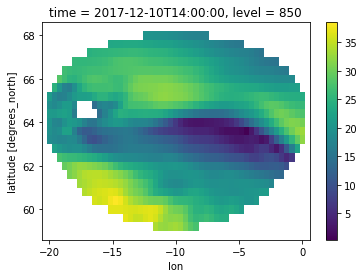

2.0
Mean horizontal windspeed at 850hPa:	22.52 m/s


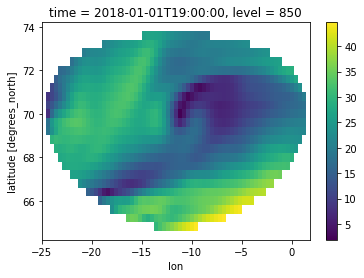

3.0
Mean horizontal windspeed at 850hPa:	30.49 m/s


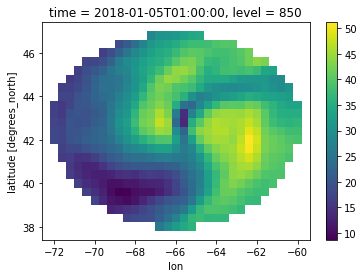

4.0
Mean horizontal windspeed at 850hPa:	19.89 m/s


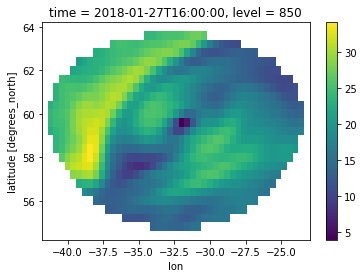

5.0
Here
Mean horizontal windspeed at 850hPa:	13.00 m/s


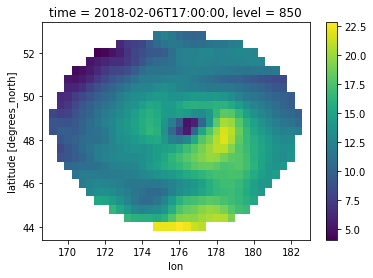

6.0
Mean horizontal windspeed at 850hPa:	19.12 m/s


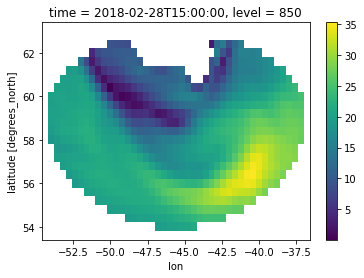

7.0
Mean horizontal windspeed at 850hPa:	19.78 m/s


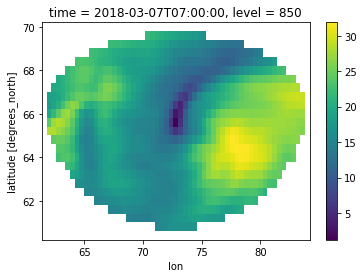

8.0
Mean horizontal windspeed at 850hPa:	20.11 m/s


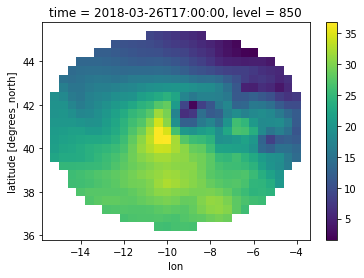

9.0
Mean horizontal windspeed at 850hPa:	22.59 m/s


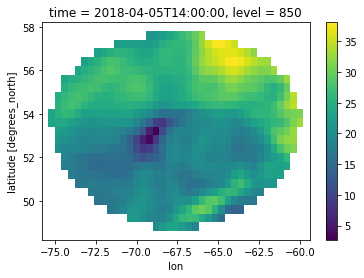

10.0
Mean horizontal windspeed at 850hPa:	16.09 m/s


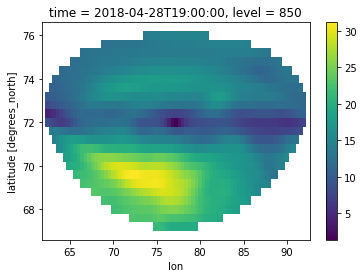

11.0
Mean horizontal windspeed at 850hPa:	20.55 m/s


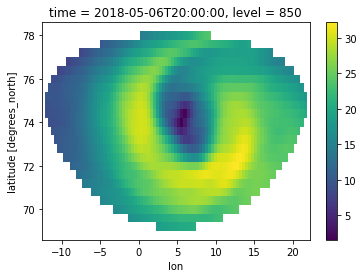

12.0
Mean horizontal windspeed at 850hPa:	23.22 m/s


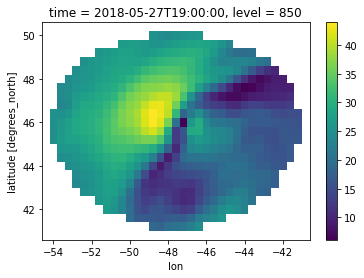

13.0
Mean horizontal windspeed at 850hPa:	10.43 m/s


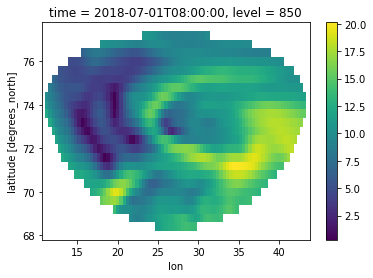

14.0
Mean horizontal windspeed at 850hPa:	16.32 m/s


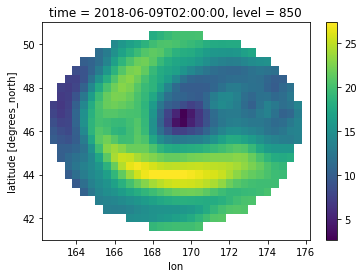

15.0
Mean horizontal windspeed at 850hPa:	13.85 m/s


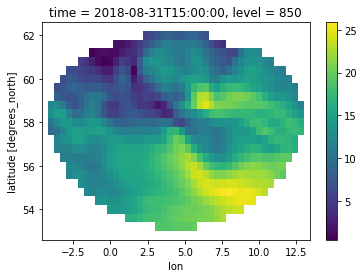

16.0
Mean horizontal windspeed at 850hPa:	13.37 m/s


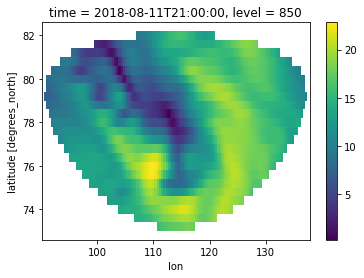

17.0
Mean horizontal windspeed at 850hPa:	19.39 m/s


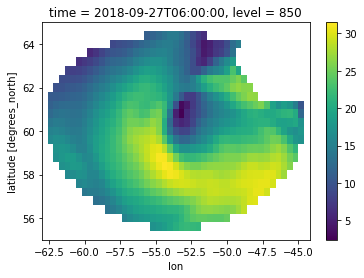

18.0
Mean horizontal windspeed at 850hPa:	26.46 m/s


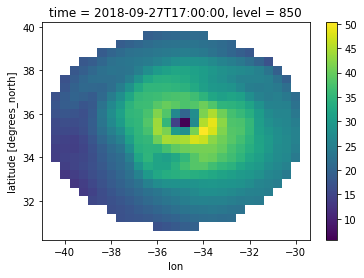

19.0
Mean horizontal windspeed at 850hPa:	23.44 m/s


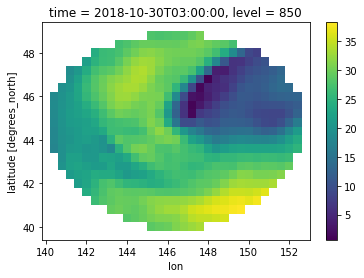

20.0
Mean horizontal windspeed at 850hPa:	19.71 m/s


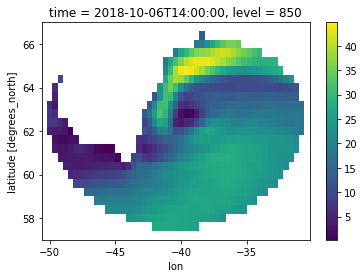

21.0
Mean horizontal windspeed at 850hPa:	16.41 m/s


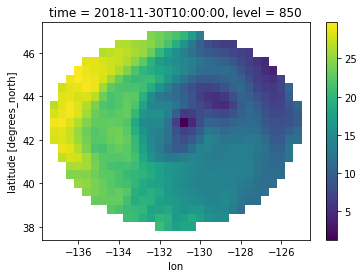

22.0
Mean horizontal windspeed at 850hPa:	15.79 m/s


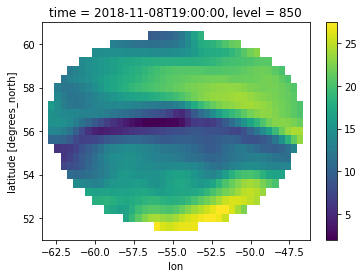

In [201]:
mean_wind = []
total_cooling, total_cooling_pred = [], []
for i in np.unique(df_big['id_CYC']):
    print(i)
    mean_wind.append(traj_processing_functions.get_avg_geostrophic_wind(df=df_big, cyc_id=i, radius=500, pres_level=850,show_plot=True))
    plt.show()
    ## Calcualte total cooling
    df_1cyc = df_big[(df_big['id_CYC']==i) & (df_big['time']==0)]
    
    Atsubsi_tot  = np.sum(df_1cyc['Atsubsi'])
    Atmeltsi_tot = np.sum(df_1cyc['Atmeltsi'])
    total_cooling.append(Atsubsi_tot + Atmeltsi_tot)
        
    Atsubsi_tot_pred  = np.sum(df_1cyc['Atsubsi_pred'])
    Atmeltsi_tot_pred = np.sum(df_1cyc['Atmeltsi_pred'])
    total_cooling_pred.append(Atsubsi_tot_pred + Atmeltsi_tot_pred)


Text(0, 0.5, 'Mean Windspeed at 850hPa in a radius of 500 km')

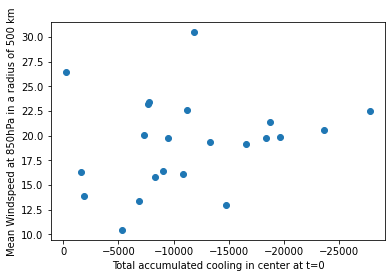

In [24]:
fig,ax = plt.subplots()
ax.scatter(total_cooling_pred, mean_wind)
ax.invert_xaxis()
ax.set_xlabel('Total accumulated cooling in center at t=0')
ax.set_ylabel('Mean Windspeed at 850hPa in a radius of 500 km')